<a href="https://colab.research.google.com/github/tamberohit49/Colab-Projects/blob/main/Descriptive_Stats_%26_Probability_Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import poisson

In [ ]:
df=pd.read_csv('/content/aerofit.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [ ]:
df.info()

NameError: ignored

In [ ]:
 #checking for Data Shape
 print(df.shape)


#Checking for Duplicate Values
print(df.duplicated().sum())

#checking for data Unique values
print(df.nunique())

(180, 9)
0
Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
a=df.groupby('Gender')['Income'].mean()
a

Gender
Female    49828.907895
Male      56562.759615
Name: Income, dtype: float64

In [ ]:
pd.crosstab(df['Gender'],df['MaritalStatus'])

MaritalStatus,Partnered,Single
Gender,,
Female,46,30
Male,61,43


<Axes: xlabel='Gender', ylabel='count'>

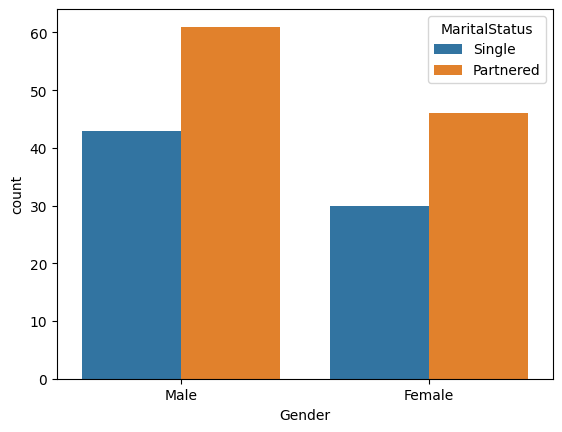

In [ ]:
sns.countplot(x='Gender',hue='MaritalStatus',data=df)

In [ ]:
pd.crosstab(df['MaritalStatus'],df['Product'])

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


<Axes: xlabel='Product', ylabel='count'>

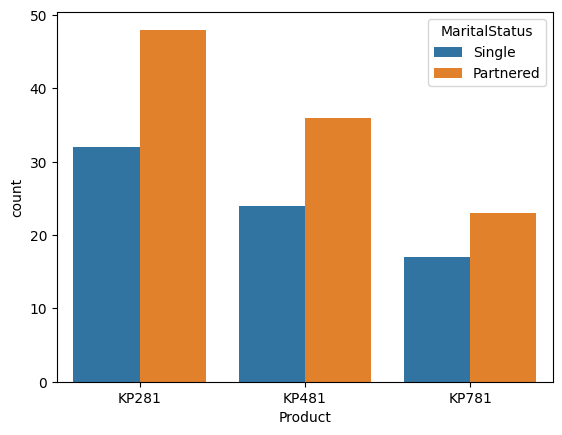

In [ ]:
sns.countplot(x='Product',hue='MaritalStatus',data=df)

In [ ]:
pd.crosstab(df['Gender'],df['Product'])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


<Axes: xlabel='Gender', ylabel='count'>

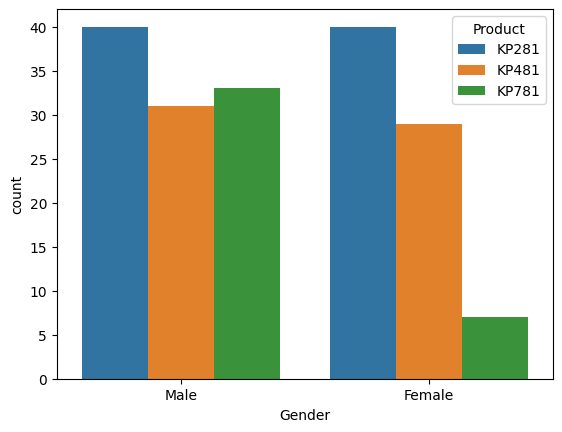

In [ ]:
sns.countplot(x='Gender',hue='Product',data=df)

In [ ]:
sns.pairplot(p281)

In [ ]:
p281=df.groupby('Product').get_group('KP281')
p481=df.groupby('Product').get_group('KP481')
p781=df.groupby('Product').get_group('KP781')

In [ ]:
p481.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [ ]:
inc = ['income', 'MaritalStatus']
p481.groupby('MaritalStatus')['Income'].max().reset_index()


,MaritalStatus,Income
0,Partnered,64809
1,Single,67083


In [ ]:
p481.groupby('MaritalStatus')['Income'].min().reset_index()

,MaritalStatus,Income
0,Partnered,32973
1,Single,31836


In [ ]:
pd.crosstab(df['Fitness'],df['Product'],normalize=True)

Product,KP281,KP481,KP781
Fitness,,,
1,0.005556,0.005556,0.000000
2,0.077778,0.066667,0.000000
3,0.300000,0.216667,0.022222
4,0.050000,0.044444,0.038889
5,0.011111,0.000000,0.161111


In [ ]:
pd.crosstab(df['Age'],df['Fitness'], df['Gender'])

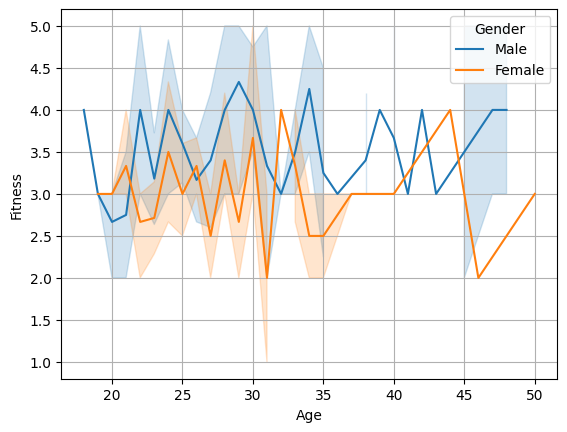

In [ ]:
h=sns.lineplot(data=df,x='Age',y='Fitne ss',hue='Gender')
plt.grid()

In [ ]:
df.groupby('Product').size().div(len(df))

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
dtype: float64

Text(0.5, 1.0, 'Maratial status wise income distribution')

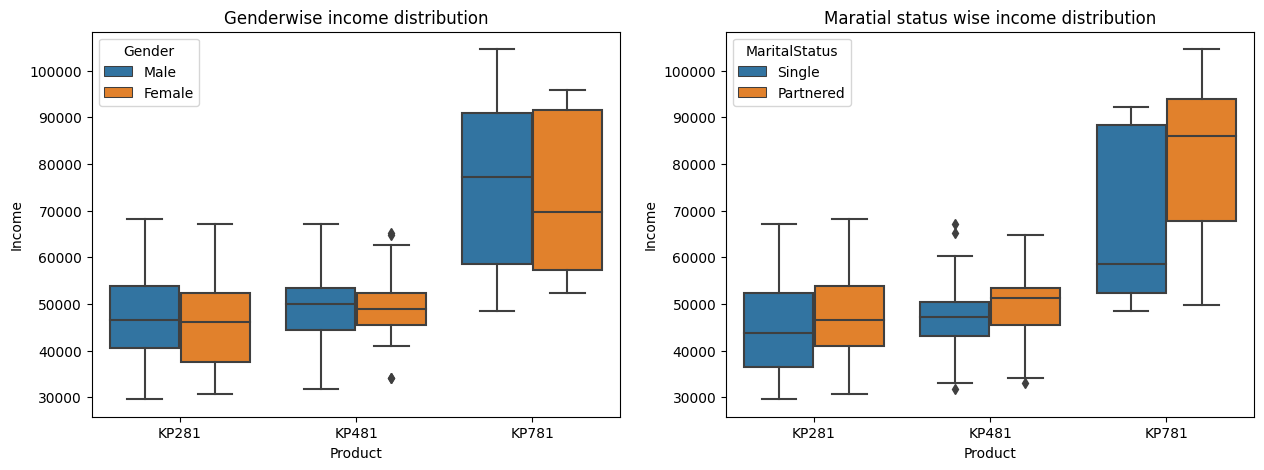

In [ ]:
fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x='Product',y='Income',hue='Gender' , data=df)
plt.title('Genderwise income distribution')
plt.subplot(1,2,2)
sns.boxplot(x='Product',y='Income',hue='MaritalStatus' , data=df)
plt.title('Maratial status wise income distribution')


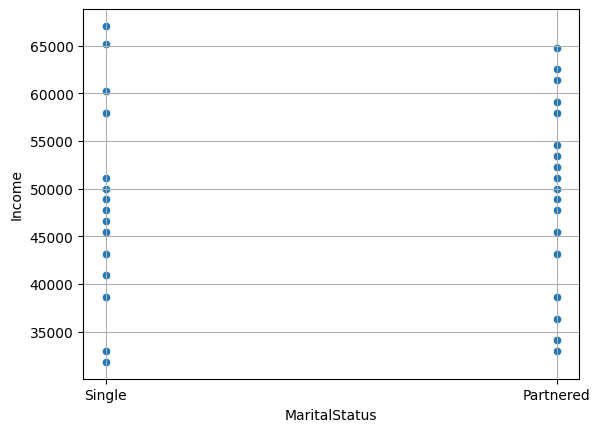

In [ ]:
sns.scatterplot(x='MaritalStatus', y='Income' , data=p481)
plt.grid()


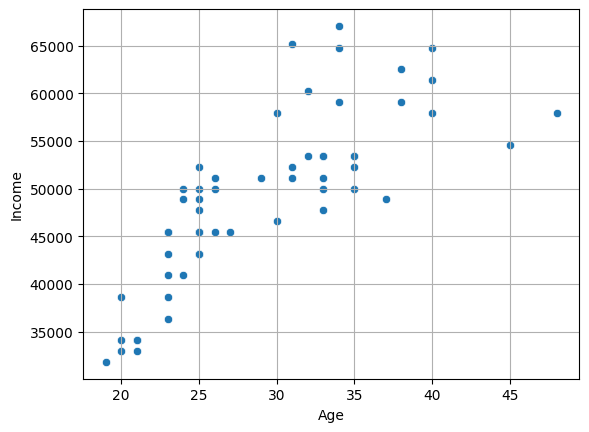

In [ ]:
sns.scatterplot(x='Age', y='Income' , data=p481)
plt.grid()

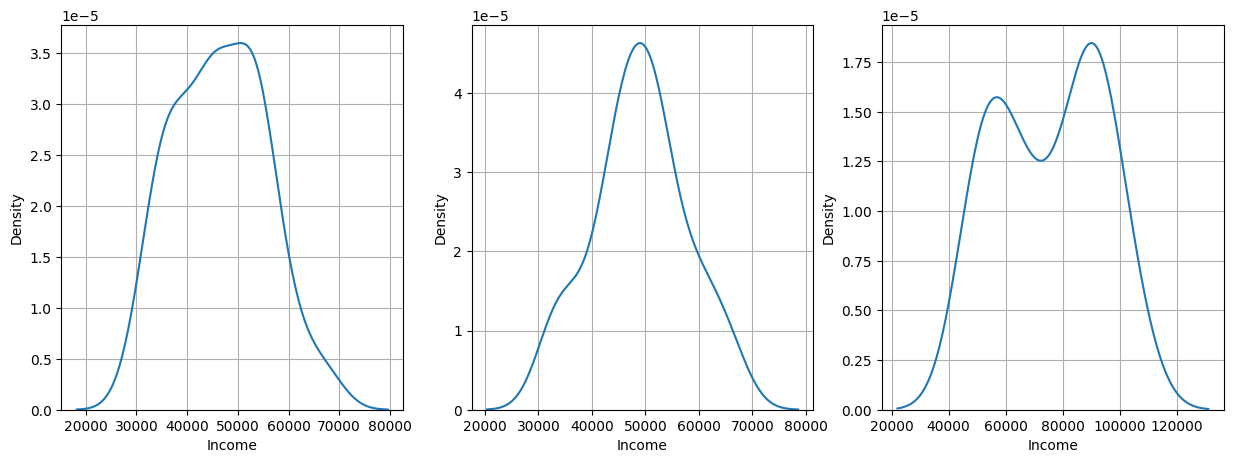

In [ ]:
fig=plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
s=sns.kdeplot(x='Income',data=p281)
plt.grid()
plt.subplot(1,3,2)
s=sns.kdeplot(x='Income',data=p481)
plt.grid()

plt.subplot(1,3,3)
s=sns.kdeplot(x='Income',data=p781)
plt.grid()


In [ ]:
mu=round(p281['Income'].mean(),2)
sig=round(p281['Income'].std(),2)
norm(mu,sig).ppf(0.25),norm(mu,sig).ppf(0.975)

(40296.4994149654, 64206.22193160893)

In [ ]:
mu=round(p481['Income'].mean(),2)
sig=round(p481['Income'].std(),2)
norm(mu,sig).ppf(0.25),norm(mu,sig).ppf(0.975)

(43136.62244670061, 65935.15872256979)

In [ ]:
mu=round(p781['Income'].mean(),2)
sig=round(p781['Income'].std(),2)
norm(mu,sig).ppf(0.25),norm(mu,sig).ppf(0.975)

In [ ]:
#customer Segmentation

In [ ]:
selected_features = ['Age', 'Income']
data_for_segmentation = df[selected_features]
data_for_segmentation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_segmentation)

from sklearn.cluster import KMeans

num_clusters = 4  # Adjust based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=selected_features)
cluster_df['Cluster'] = range(num_clusters)

# Merge cluster information back to the original customer_data DataFrame
df = pd.merge(df, cluster_df, on='Cluster', how='left')
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Product,Age_x,Gender,Education,MaritalStatus,Usage,Fitness,Income_x,Miles,Cluster,Age_y,Income_y
0,KP281,18,Male,14,Single,3,4,29562,112,0,22.716667,39533.60
1,KP281,19,Male,15,Single,2,3,31836,75,0,22.716667,39533.60
2,KP281,19,Female,14,Partnered,4,3,30699,66,0,22.716667,39533.60
3,KP281,19,Male,12,Single,3,3,32973,85,0,22.716667,39533.60
4,KP281,20,Male,13,Partnered,4,2,35247,47,0,22.716667,39533.60
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,1,33.850000,91926.35
176,KP781,42,Male,18,Single,5,4,89641,200,1,33.850000,91926.35
177,KP781,45,Male,16,Single,5,5,90886,160,1,33.850000,91926.35
178,KP781,47,Male,18,Partnered,4,5,104581,120,1,33.850000,91926.35


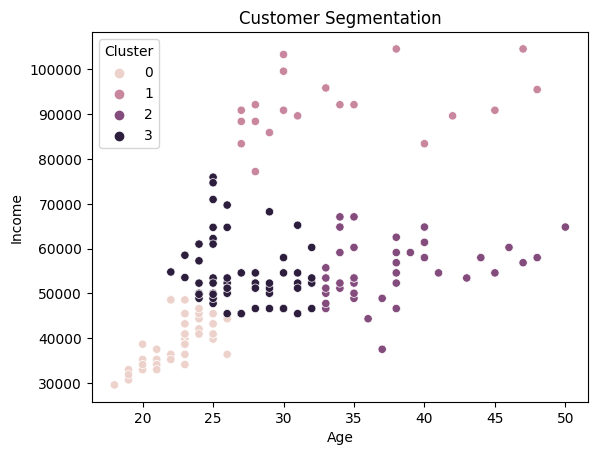

In [ ]:
sns.scatterplot(x='Age_x', y='Income_x', data=df, hue='Cluster')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()